In [ ]:
import numpy as np
import time
from tensorflow.examples.tutorials.mnist import input_data
import pickle

In [274]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv1D, UpSampling1D, Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop

In [22]:
precision = 8
channels = 3

In [43]:
depth = 16
dropout = 0.4

In [191]:
discriminator = Sequential()
input_shape = (2**precision,3)
discriminator.add(Conv1D(depth,5, input_shape=input_shape,strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Conv1D(depth*2,5, input_shape=input_shape,strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Conv1D(depth*4,5, input_shape=input_shape,strides=4, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Flatten())
discriminator.add(Dense(1))
discriminator.add(Activation('sigmoid'))

discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 128, 16)           256       
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 128, 16)           0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 128, 16)           0         
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 64, 32)            2592      
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 64, 32)            0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 64, 32)            0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 16, 64)            10304     
__________

In [192]:
generator = Sequential()
input_shape = (2**precision,3)
generator.add(Conv1D(depth,5, input_shape=input_shape,strides=2, padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dropout(dropout))

generator.add(Conv1D(depth*2,5, input_shape=input_shape,strides=2, padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dropout(dropout))

generator.add(UpSampling1D())
generator.add(UpSampling1D())
generator.add(Dense(3))
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           (None, 128, 16)           256       
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 128, 16)           0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 128, 16)           0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 64, 32)            2592      
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 64, 32)            0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 64, 32)            0         
_________________________________________________________________
up_sampling1d_13 (UpSampling (None, 128, 32)           0         
__________

In [195]:
optimizer = RMSprop(lr=0.0002, decay=6e-8)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer,\
        metrics=['accuracy'])

In [224]:
adverserial = Sequential()
optimizer = RMSprop(lr=0.0001, decay=3e-8)
adverserial.add(generator)
adverserial.add(discriminator)
adverserial.compile(loss='binary_crossentropy', optimizer=optimizer,\
        metrics=['accuracy'])
adverserial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_49 (Sequential)   (None, 256, 3)            2947      
_________________________________________________________________
sequential_48 (Sequential)   (None, 1)                 14177     
Total params: 17,124
Trainable params: 17,124
Non-trainable params: 0
_________________________________________________________________


In [225]:
infile = open("datasets/natural/histograms.p",'rb')
natural = pickle.load(infile)

In [226]:
infile = open("datasets/retouched/histograms.p",'rb')
retouched = pickle.load(infile)

In [227]:
np.array(natural[0][1])[:,:,0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.50176046e-05,
        5.50176046e-05, 5.50176046e-05, 0.00000000e+00, 0.00000000e+00,
        5.50176046e-05, 0.00000000e+00, 1.10035209e-04, 5.50176046e-05,
        0.00000000e+00, 1.65052814e-04, 2.20070418e-04, 2.75088038e-04,
        2.20070418e-04, 4.40140837e-04, 3.30105628e-04, 6.05193665e-04,
        4.40140837e-04, 8.25264084e-04, 7.15228845e-04, 5.50176075e-04,
        1.29841547e-02, 2.58582737e-02, 2.62984149e-02, 2.48129405e-02,
        2.24471837e-02, 1.99713912e-02, 1.85409337e-02, 1.606514

In [239]:
x = np.vstack(list(map(lambda x: [np.array(x[1])[:,:,0].T],(natural + retouched))))

In [240]:
x.shape

(7935, 256, 3)

In [241]:
y = [1]*len(natural) + [0]*len(retouched)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [694]:
def train(train_steps, batch_size, save_interval):
    for i in range(train_steps):
        batch = np.random.randint(0,
            X_train.shape[0], size=batch_size)
        batch_X_train = X_train[batch]
        batch_y_train = np.array(y_train)[batch]
        merged = np.take(np.hstack((generator.predict(batch_X_train), batch_X_train)), batch_y_train,axis=1)
        d_loss = discriminator.train_on_batch(merged, batch_y_train)
        natural = batch_X_train[batch_y_train==1]
        
        a_loss = adverserial.train_on_batch(natural, [1] * natural.shape[0])
    #     noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
    #     images_fake = self.generator.predict(noise)
    #     x = np.concatenate((images_train, images_fake))
    #     y = np.ones([2*batch_size, 1])
    #     y[batch_size:, :] = 0
        

    #     y = np.ones([batch_size, 1])
    #     noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
    #    a_loss = self.adversarial.train_on_batch(noise, y)
        print(((d_loss), (a_loss)))
    #     if save_interval>0:
    #         if (i+1)%save_interval==0:
    #             self.plot_images(save2file=True, samples=noise_input.shape[0],\
    #                 noise=noise_input, step=(i+1))


train(train_steps=1000, batch_size=256, save_interval=500)

([0.43614212, 0.859375], [0.058260914, 1.0])
([0.45809525, 0.8515625], [0.06023607, 1.0])
([0.37603852, 0.8828125], [0.06669394, 1.0])
([0.3978466, 0.8828125], [0.05378103, 1.0])
([0.37111795, 0.87890625], [0.048520084, 1.0])
([0.5327922, 0.828125], [0.066860884, 1.0])
([0.43365544, 0.859375], [0.054796673, 1.0])
([0.4233095, 0.86328125], [0.06887715, 1.0])
([0.43125734, 0.86328125], [0.061089266, 1.0])
([0.42616487, 0.86328125], [0.058252983, 1.0])
([0.32194152, 0.90234375], [0.05083168, 1.0])
([0.44035327, 0.859375], [0.050599705, 1.0])
([0.4458179, 0.8515625], [0.061186258, 1.0])
([0.3712613, 0.87890625], [0.05878346, 1.0])
([0.42332307, 0.86328125], [0.055869956, 1.0])
([0.35525385, 0.890625], [0.05584286, 1.0])
([0.38560545, 0.87890625], [0.05604818, 1.0])
([0.40522435, 0.87109375], [0.04990101, 1.0])
([0.42475748, 0.85546875], [0.06168389, 1.0])
([0.4639589, 0.84375], [0.07540976, 1.0])
([0.38993376, 0.8828125], [0.057367947, 1.0])
([0.415197, 0.87109375], [0.051164135, 1.0])
([0

([0.34802967, 0.89453125], [0.041145425, 1.0])
([0.4865991, 0.84375], [0.054952074, 1.0])
([0.38035643, 0.875], [0.047700133, 1.0])
([0.42283595, 0.87109375], [0.050440766, 1.0])
([0.35532114, 0.89453125], [0.03752398, 1.0])
([0.42914617, 0.8671875], [0.043130737, 1.0])
([0.36274377, 0.88671875], [0.04501461, 1.0])
([0.42190412, 0.859375], [0.04592398, 1.0])
([0.30205867, 0.92578125], [0.03791792, 1.0])
([0.39345682, 0.87890625], [0.03947199, 1.0])
([0.425155, 0.8671875], [0.043515515, 1.0])
([0.45913795, 0.8515625], [0.052908722, 1.0])
([0.38640907, 0.875], [0.044591065, 1.0])
([0.43663818, 0.86328125], [0.04715494, 1.0])
([0.35306436, 0.88671875], [0.039510395, 1.0])
([0.42971382, 0.859375], [0.042106364, 1.0])
([0.36707193, 0.890625], [0.046246737, 1.0])
([0.47692668, 0.859375], [0.058121607, 1.0])
([0.3571012, 0.8984375], [0.041187987, 1.0])
([0.40089434, 0.875], [0.039537873, 1.0])
([0.41620645, 0.875], [0.043115545, 1.0])
([0.39863688, 0.875], [0.046258934, 1.0])
([0.43214953, 0.

([0.3872763, 0.87890625], [0.042197514, 1.0])
([0.4351316, 0.8671875], [0.04232465, 1.0])
([0.44647092, 0.86328125], [0.044954702, 0.9954751])
([0.40210664, 0.8671875], [0.043162014, 1.0])
([0.496061, 0.8359375], [0.045609243, 1.0])
([0.39503053, 0.875], [0.050678406, 1.0])
([0.39642772, 0.875], [0.04247076, 1.0])
([0.3594101, 0.88671875], [0.042830553, 1.0])
([0.47471103, 0.84765625], [0.048960224, 1.0])
([0.3828941, 0.8828125], [0.049322717, 1.0])
([0.33757055, 0.91015625], [0.031582996, 1.0])
([0.41160983, 0.875], [0.03783663, 1.0])
([0.4734328, 0.84375], [0.04812336, 1.0])
([0.4761954, 0.8515625], [0.050157614, 1.0])
([0.38225126, 0.88671875], [0.04334761, 1.0])
([0.40909016, 0.88671875], [0.043747045, 1.0])
([0.45858854, 0.84765625], [0.0503454, 1.0])
([0.5291508, 0.8125], [0.055869304, 1.0])
([0.43785626, 0.84375], [0.049951382, 1.0])
([0.39693016, 0.86328125], [0.047469456, 1.0])
([0.48937193, 0.84375], [0.049144108, 1.0])
([0.42597556, 0.8671875], [0.04329934, 1.0])
([0.4108873

([0.4966128, 0.8359375], [0.045443498, 1.0])
([0.37703842, 0.89453125], [0.04578436, 1.0])
([0.3919171, 0.8828125], [0.039978195, 1.0])
([0.36892605, 0.890625], [0.033832565, 1.0])
([0.3877867, 0.87890625], [0.043537397, 1.0])
([0.3319817, 0.91796875], [0.033111196, 1.0])
([0.43666664, 0.8671875], [0.036343485, 1.0])
([0.42896885, 0.859375], [0.05150759, 1.0])
([0.38488638, 0.8671875], [0.04714932, 1.0])
([0.42195767, 0.87890625], [0.044993125, 1.0])
([0.45430225, 0.84765625], [0.04839143, 1.0])
([0.39791995, 0.875], [0.04924923, 1.0])
([0.48706543, 0.84375], [0.048706386, 1.0])
([0.41684657, 0.859375], [0.05425339, 1.0])
([0.28242195, 0.9140625], [0.040203206, 1.0])
([0.4595663, 0.86328125], [0.04518163, 1.0])
([0.32279736, 0.91796875], [0.0356608, 1.0])
([0.48791033, 0.83984375], [0.050876293, 1.0])
([0.44983873, 0.84375], [0.059460912, 0.9953917])
([0.37553805, 0.890625], [0.040330213, 1.0])
([0.40281206, 0.87890625], [0.042921517, 1.0])
([0.4003784, 0.88671875], [0.043620083, 1.0])

([0.42535758, 0.8671875], [0.044287067, 1.0])
([0.46374607, 0.84765625], [0.04443711, 1.0])
([0.39772922, 0.87109375], [0.047309637, 1.0])
([0.52669597, 0.8203125], [0.0594209, 1.0])
([0.3671736, 0.89453125], [0.036459986, 1.0])
([0.43406752, 0.87109375], [0.042009387, 0.99553573])
([0.42729658, 0.87109375], [0.045146935, 1.0])
([0.5002705, 0.8359375], [0.052214555, 1.0])
([0.4155733, 0.859375], [0.053187612, 1.0])
([0.35431892, 0.8984375], [0.035272624, 1.0])
([0.40256584, 0.8828125], [0.034790274, 1.0])
([0.39986452, 0.8828125], [0.040052675, 1.0])
([0.4652839, 0.85546875], [0.04725312, 1.0])
([0.44631734, 0.85546875], [0.050503135, 1.0])
([0.37928903, 0.8828125], [0.046189446, 1.0])
([0.4117884, 0.8671875], [0.042731784, 1.0])
([0.42089027, 0.875], [0.040544458, 1.0])
([0.36830938, 0.890625], [0.031276673, 1.0])
([0.39240518, 0.87890625], [0.039623033, 1.0])
([0.43205506, 0.86328125], [0.04761186, 1.0])
([0.4667402, 0.84375], [0.053254664, 0.9953917])
([0.44553977, 0.8671875], [0.04

([0.41440254, 0.86328125], [0.047154363, 1.0])
([0.37130016, 0.88671875], [0.038465478, 1.0])
([0.45630875, 0.8515625], [0.04519257, 1.0])
([0.44982445, 0.84375], [0.055819638, 1.0])
([0.45007253, 0.859375], [0.05241999, 1.0])
([0.3886776, 0.89453125], [0.03561801, 1.0])
([0.5624244, 0.8203125], [0.057052128, 1.0])
([0.4034492, 0.87109375], [0.03788412, 0.9955556])
([0.43169564, 0.87890625], [0.0368288, 1.0])
([0.4265454, 0.86328125], [0.041178208, 1.0])
([0.43117985, 0.86328125], [0.045984272, 1.0])
([0.40632653, 0.87109375], [0.038561523, 1.0])
([0.352893, 0.8984375], [0.036057655, 1.0])
([0.41173702, 0.86328125], [0.041631926, 0.9954751])
([0.4311914, 0.859375], [0.039430402, 1.0])
([0.36651412, 0.87890625], [0.039437227, 1.0])
([0.36160332, 0.8828125], [0.035226777, 1.0])
([0.39169908, 0.88671875], [0.03041905, 1.0])
([0.4328658, 0.875], [0.0359784, 1.0])
([0.44815758, 0.859375], [0.053004883, 1.0])
([0.41673756, 0.87890625], [0.041784447, 1.0])
([0.43036637, 0.86328125], [0.044564

In [695]:
imageNum=156

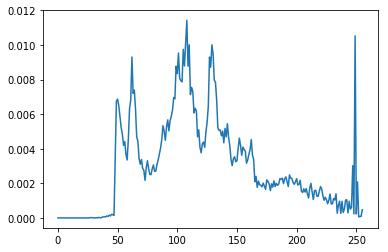

In [696]:
plt.plot(natural[imageNum][1][0])

In [697]:
old = np.array(natural[imageNum][1]).T[0]

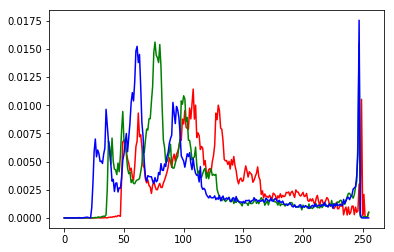

In [698]:
plt.plot(old[:,0],color="r")
plt.plot(old[:,1],color="g")
plt.plot(old[:,2],color="b")

In [699]:
res = generator.predict(np.array(natural[imageNum][1]).T)

In [700]:
new = res[0]

In [701]:
new

array([[-2.9626777, -2.2230375, -4.055792 ],
       [-2.9626777, -2.2230375, -4.055792 ],
       [-2.9626777, -2.2230375, -4.055792 ],
       [-2.9626777, -2.2230375, -4.055792 ],
       [-3.5614543, -2.6569245, -4.8623505],
       [-3.5614543, -2.6569245, -4.8623505],
       [-3.5614543, -2.6569245, -4.8623505],
       [-3.5614543, -2.6569245, -4.8623505],
       [-3.5613418, -2.6568391, -4.862192 ],
       [-3.5613418, -2.6568391, -4.862192 ],
       [-3.5613418, -2.6568391, -4.862192 ],
       [-3.5613418, -2.6568391, -4.862192 ],
       [-3.560826 , -2.6564634, -4.8614893],
       [-3.560826 , -2.6564634, -4.8614893],
       [-3.560826 , -2.6564634, -4.8614893],
       [-3.560826 , -2.6564634, -4.8614893],
       [-3.5471675, -2.6473124, -4.8431396],
       [-3.5471675, -2.6473124, -4.8431396],
       [-3.5471675, -2.6473124, -4.8431396],
       [-3.5471675, -2.6473124, -4.8431396],
       [-3.484486 , -2.6004949, -4.7573185],
       [-3.484486 , -2.6004949, -4.7573185],
       [-3

In [702]:
for c in range(3):
    res[0][:,c] = res[0][:,c] - min(res[0][:,c])
    res[0][:,c] = res[0][:,c] / max(res[0][:,c])

In [703]:
res[0][0:5] = [0,0,0]
res[0][250:] = [0,0,0]

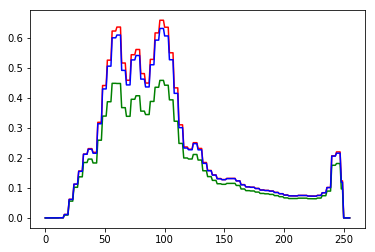

In [704]:
plt.plot(res[0][:,0],color="r")
plt.plot(res[0][:,1],color="g")
plt.plot(res[0][:,2],color="b")

In [705]:
res[0][:,0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.06619898e-05, 9.06619898e-05, 9.06619898e-05, 9.06619898e-05,
       5.06132084e-04, 5.06132084e-04, 5.06132084e-04, 5.06132084e-04,
       1.15100387e-02, 1.15100387e-02, 1.15100387e-02, 1.15100387e-02,
       6.20089583e-02, 6.20089583e-02, 6.20089583e-02, 6.20089583e-02,
       1.11984074e-01, 1.11984074e-01, 1.11984074e-01, 1.11984074e-01,
       1.56064242e-01, 1.56064242e-01, 1.56064242e-01, 1.56064242e-01,
       2.12402984e-01, 2.12402984e-01, 2.12402984e-01, 2.12402984e-01,
       2.30511561e-01, 2.30511561e-01, 2.30511561e-01, 2.30511561e-01,
       2.18204200e-01, 2.18204200e-01, 2.18204200e-01, 2.18204200e-01,
       3.18073362e-01, 3.18073362e-01, 3.18073362e-01, 3.18073362e-01,
       4.40475315e-01, 4.40475315e-01, 4.40475315e-01, 4.40475315e-01,
       5.24875462e-01, 5.24875462e-01, 5.24875462e-01, 5.24875462e-01,
      

In [706]:
res.shape

(1, 256, 3)

In [707]:
img = cv2.imread(natural[imageNum][0])

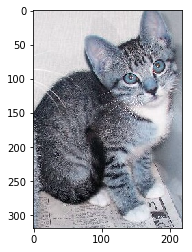

In [708]:
plt.imshow(img)

In [709]:
lookups = {}
for i in range(256):
    
    for channel in range(3):
        oldPercentage = sum(old[:,channel][:i]) / sum(old[:,channel])
        newPercentage = sum(new[:,channel][:i]) / sum(new[:,channel])
        newVal = 0
        while((sum(old[:,channel][:newVal]) / sum(old[:,channel])) < newPercentage):
            newVal+=1
            if(newVal > 254):
                break
        lookups[(i, channel)] = newVal
        
def mapPixelAccordingToHistogramChange(pixel):
    return [lookups[(pixel[0],0)],lookups[(pixel[1],1)],lookups[(pixel[2],2)]]

In [710]:
mapPixelAccordingToHistogramChange([40,20,50])

[56, 34, 38]

In [711]:
bla = np.zeros(img.shape)
for a in range(img.shape[0]):
    for b in range(img.shape[1]):
        bla[a,b] = mapPixelAccordingToHistogramChange(img[a,b])

In [712]:
bla[0,0]

array([220., 233., 238.])

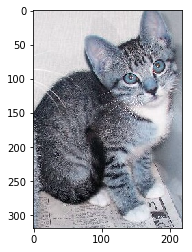

In [713]:
plt.imshow(img)

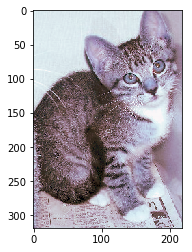

In [714]:
plt.imshow(bla/255)